In [1]:
import numpy as np 
import pandas as pd
import datetime as datetime
from sklearn.preprocessing import StandardScaler

# plots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
sns.set(style="whitegrid")
pd.set_option("display.max_rows", None)

In [2]:
#Cargamos los datos
events = pd.read_csv('globalterrorismdb_0718dist.csv', low_memory = False, encoding='ISO-8859-1')

### Descripcion de los datos

In [3]:
events.shape
print(f'Cantidad de eventos {events.shape[0]} y cantidad de columnas {events.shape[1]}')

Cantidad de eventos 181691 y cantidad de columnas 135


In [4]:
min_year = events['iyear'].min()
max_year = events['iyear'].max()
print(f'Datos desde {min_year} hasta {max_year}')

Datos desde 1970 hasta 2017


In [5]:
events.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
events.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [7]:
print(events.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

In [8]:
print(events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None


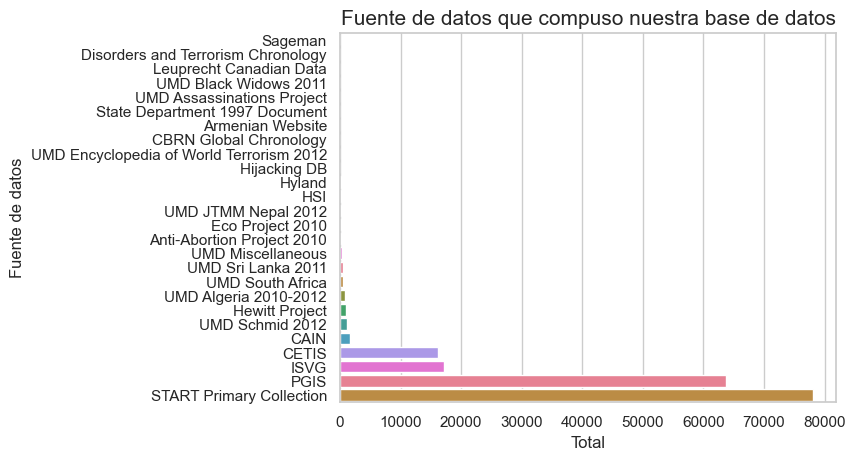

In [9]:
# Observamos la fuente de los datos que compuso nuestra base de datos
dbsource = events['dbsource']
dbsource = dbsource.value_counts().sort_values()
g = sns.barplot(y=dbsource.index, x=dbsource.values,palette=sns.color_palette("husl", 8), orient='h')
g.set_title("Fuente de datos que compuso nuestra base de datos", fontsize=15)
g.set_xlabel("Total", fontsize=12)
g.set_ylabel("Fuente de datos", fontsize=12);

### Realizamos algunas visualizaciones para comprender mejor los datos

In [10]:
# Realizamos algunas visualizaciones para enteder mejor el set de datos
events.groupby('success').agg({'success':'count'})

,success
success,
0,20059
1,161632


Text(0, 0.5, '')

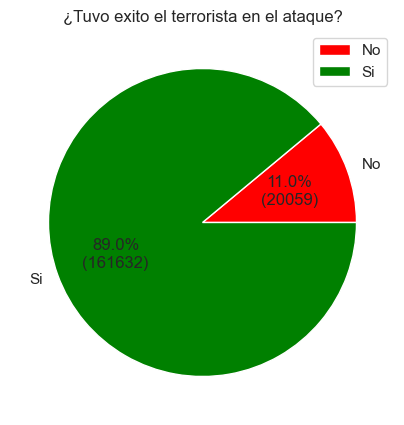

In [11]:
# Comenzamos viendo la cantidad de terroristas que tuvieron exito en sus ataques
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = events['success'].value_counts()
plot = events.groupby('success').agg({'success':'count'})
plot.index = ['No', 'Si']
g = plot.plot.pie( figsize=(5, 5), colors = ['red','green'], y='success', autopct=autopct_format(s))
g.set_title('¿Tuvo exito el terrorista en el ataque?')
g.set_ylabel('')

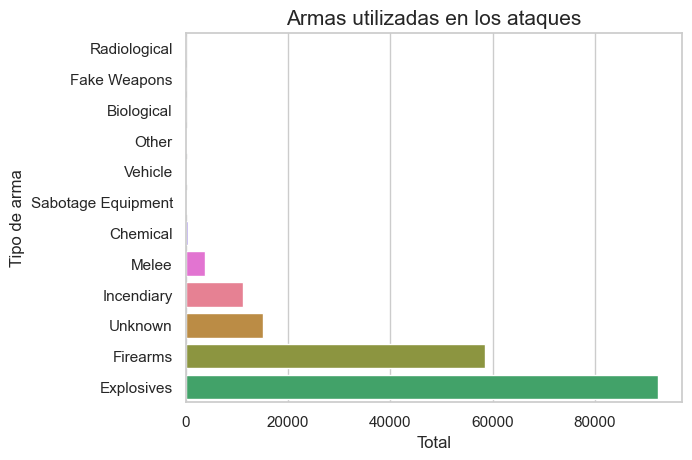

In [12]:
# Observamos los cuales eran los tipos de arma utilizados en los ataques
weapons = events.rename(columns={'weaptype1_txt': 'weapon_type'})['weapon_type'].replace("Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)", "Vehicle")
weapon_type = weapons.value_counts().sort_values()
g = sns.barplot(y=weapon_type.index, x=weapon_type.values,palette=sns.color_palette("husl", 8), orient='h')
g.set_title("Armas utilizadas en los ataques", fontsize=15)
g.set_xlabel("Total", fontsize=12)
g.set_ylabel("Tipo de arma", fontsize=12);

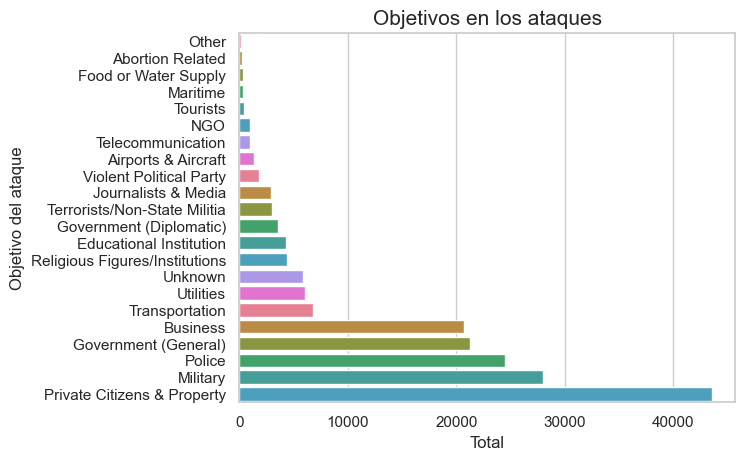

In [13]:
# Observamos los objetivos de los ataques
targets = events.rename(columns={'targtype1_txt': 'target'})['target']
targets = targets.value_counts().sort_values()
g = sns.barplot(y=targets.index, x=targets.values,palette=sns.color_palette("husl", 8), orient='h')
g.set_title("Objetivos en los ataques", fontsize=15)
g.set_xlabel("Total", fontsize=12)
g.set_ylabel("Objetivo del ataque", fontsize=12);

Text(0, 0.5, '')

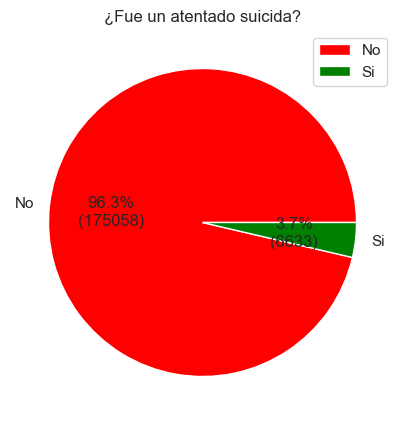

In [14]:
# Observamos cuantas veces los atacantes se suicidaron luego del atentado
s = events['suicide'].value_counts()
plot = events.groupby('suicide').agg({'suicide':'count'})
plot.index = ['No', 'Si']
g = plot.plot.pie( figsize=(5, 5), colors = ['red','green'], y='suicide', autopct=autopct_format(s))
g.set_title('¿Fue un atentado suicida?')
g.set_ylabel('')

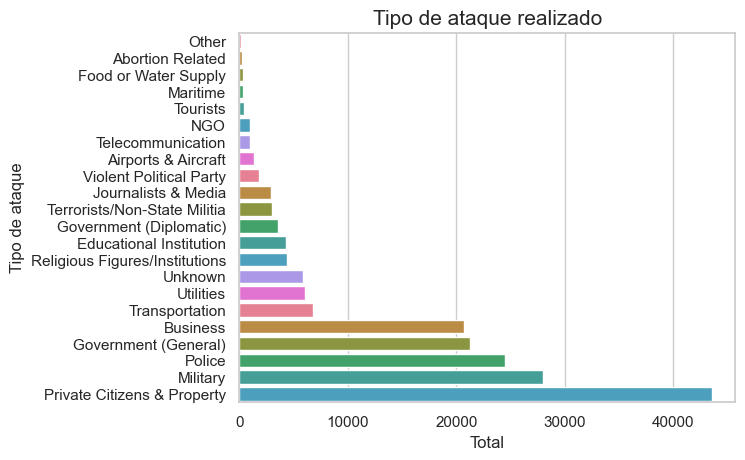

In [15]:
# Observamos el tipo de ataque realizado
attack_type = events.rename(columns={'attacktype1_txt': 'attack_type'})['attack_type']
attack_type = attack_type.value_counts().sort_values()
g = sns.barplot(y=targets.index, x=targets.values,palette=sns.color_palette("husl", 8), orient='h')
g.set_title("Tipo de ataque realizado", fontsize=15)
g.set_xlabel("Total", fontsize=12)
g.set_ylabel("Tipo de ataque", fontsize=12);

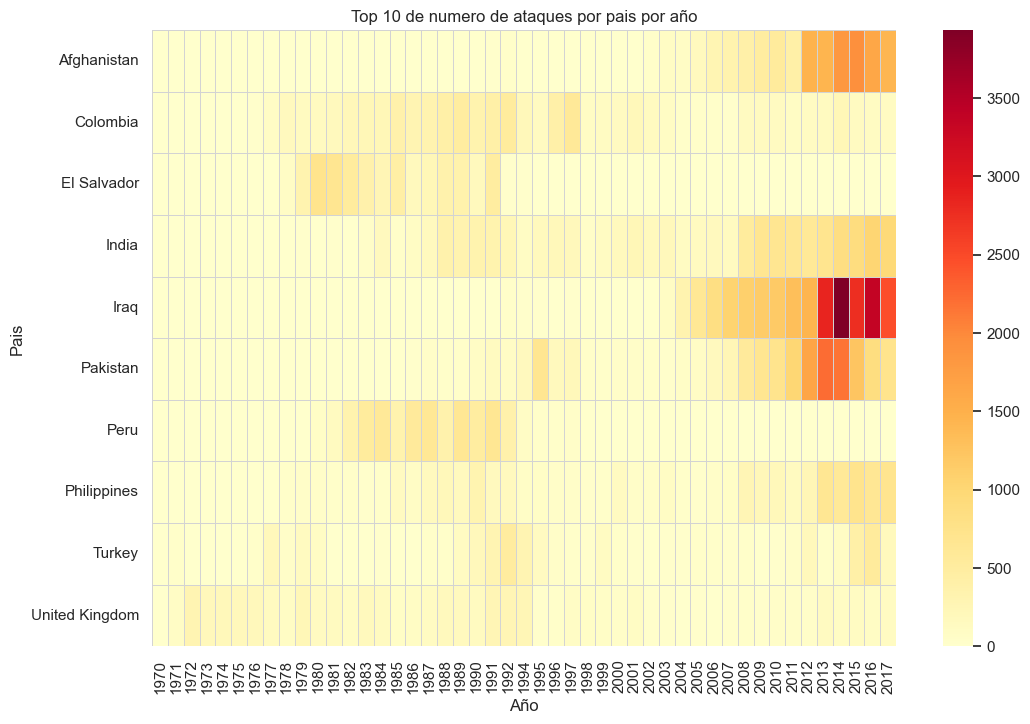

In [16]:
attacks_per_city = events[['iyear', 'country_txt']].rename(columns={'iyear': 'year'})
attacks_per_country = attacks_per_city['country_txt'].value_counts().nlargest(10)

# Filter the dataframe to include only the top 10 countries
top_10_countries = attacks_per_city[attacks_per_city['country_txt'].isin(attacks_per_country.index)]

# Reshape the data into a pivot table
pivot_table = top_10_countries.groupby(['country_txt', 'year']).size().unstack(fill_value=0)

# Create the heatmap with a larger plot size
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.5, linecolor='lightgray')
plt.title('Top 10 de numero de ataques por pais por año')
plt.xlabel('Año')
plt.ylabel('Pais')
plt.show()

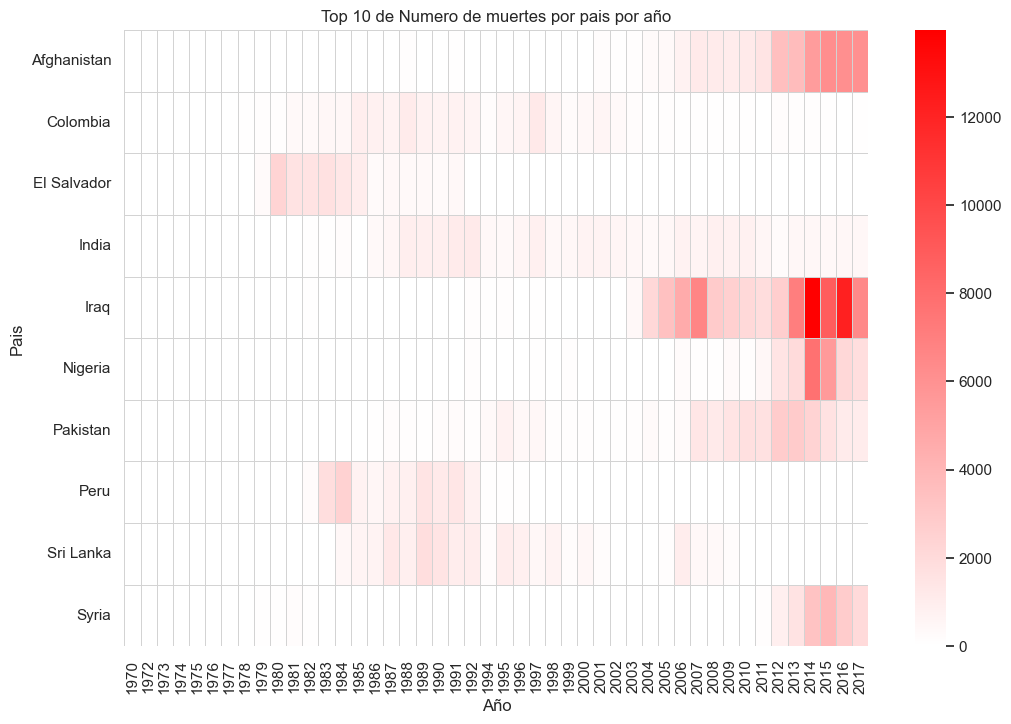

In [17]:
# Cantidad de muertes por pais por año
# Define the custom color map
colors = [(1, 1, 1), (1, 0.75, 0.75), (1, 0.5, 0.5), (1, 0.25, 0.25), (1, 0, 0)]
cmap = LinearSegmentedColormap.from_list('Custom', colors)

# Rest of the code remains the same...
# Calculate the total number of deaths per country and year
deaths_per_city = events[['iyear', 'country_txt', 'nkill']].rename(columns={'iyear': 'year'})
deaths_per_country = deaths_per_city.groupby(['country_txt', 'year'])['nkill'].sum()

# Select the top 10 countries with the highest number of deaths
top_10_countries = deaths_per_country.groupby('country_txt').sum().nlargest(10).index

# Filter the dataframe to include only the top 10 countries
filtered_data = deaths_per_city[deaths_per_city['country_txt'].isin(top_10_countries)]

# Reshape the data into a pivot table
pivot_table = filtered_data.pivot_table(index='country_txt', columns='year', values='nkill', aggfunc='sum', fill_value=0)

# Create the heatmap with a larger plot size and custom color map
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap=cmap, linewidths=0.5, linecolor='lightgray')
plt.title('Top 10 de Numero de muertes por pais por año')
plt.xlabel('Año')
plt.ylabel('Pais')
plt.show()

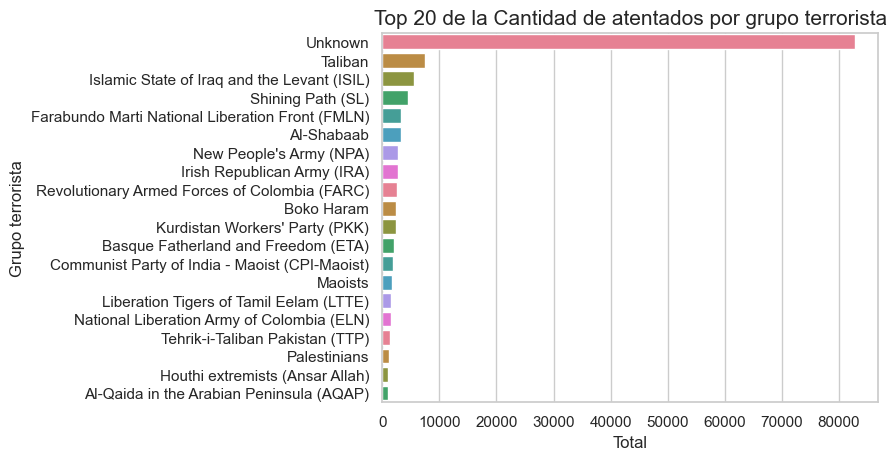

In [18]:
# Observamos el tipo de ataque realizado
terrorist_group = events['gname']
terrorist_group_top = terrorist_group.value_counts().nlargest(n=20)
g = sns.barplot(y=terrorist_group_top.index, x=terrorist_group_top.values,palette=sns.color_palette("husl", 8), orient='h')
g.set_title("Top 20 de la Cantidad de atentados por grupo terrorista", fontsize=15)
g.set_xlabel("Total", fontsize=12)
g.set_ylabel("Grupo terrorista", fontsize=12);

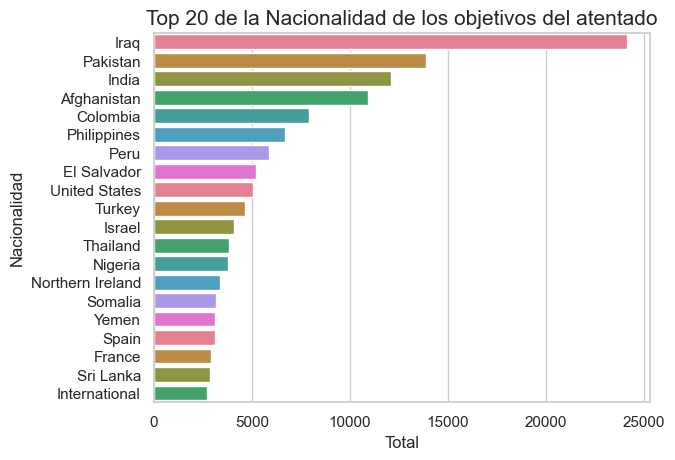

In [19]:
nationality_of_targets = events['natlty1_txt']
nationality_of_targets = nationality_of_targets.value_counts().nlargest(n=20)
g = sns.barplot(y=nationality_of_targets.index, x=nationality_of_targets.values,palette=sns.color_palette("husl", 8), orient='h')
g.set_title("Top 20 de la Nacionalidad de los objetivos del atentado", fontsize=15)
g.set_xlabel("Total", fontsize=12)
g.set_ylabel("Nacionalidad", fontsize=12);

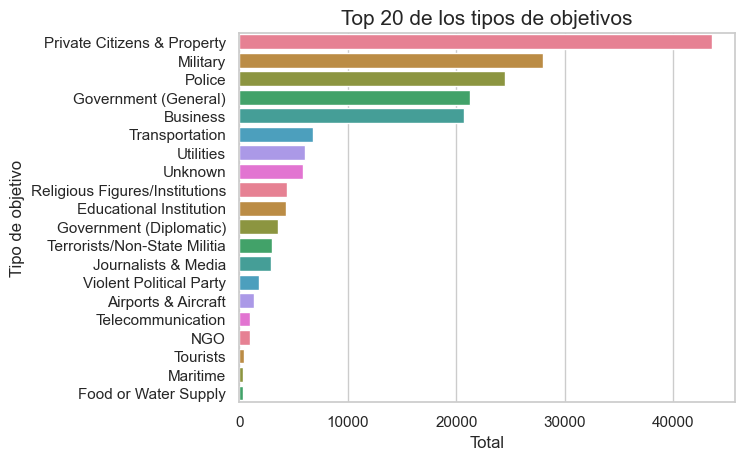

In [20]:
type_of_targets = events['targtype1_txt']
type_of_targets = type_of_targets.value_counts().nlargest(n=20)
g = sns.barplot(y=type_of_targets.index, x=type_of_targets.values,palette=sns.color_palette("husl", 8), orient='h')
g.set_title("Top 20 de los tipos de objetivos", fontsize=15)
g.set_xlabel("Total", fontsize=12)
g.set_ylabel("Tipo de objetivo", fontsize=12);

### Verificamos la calidad de los datos

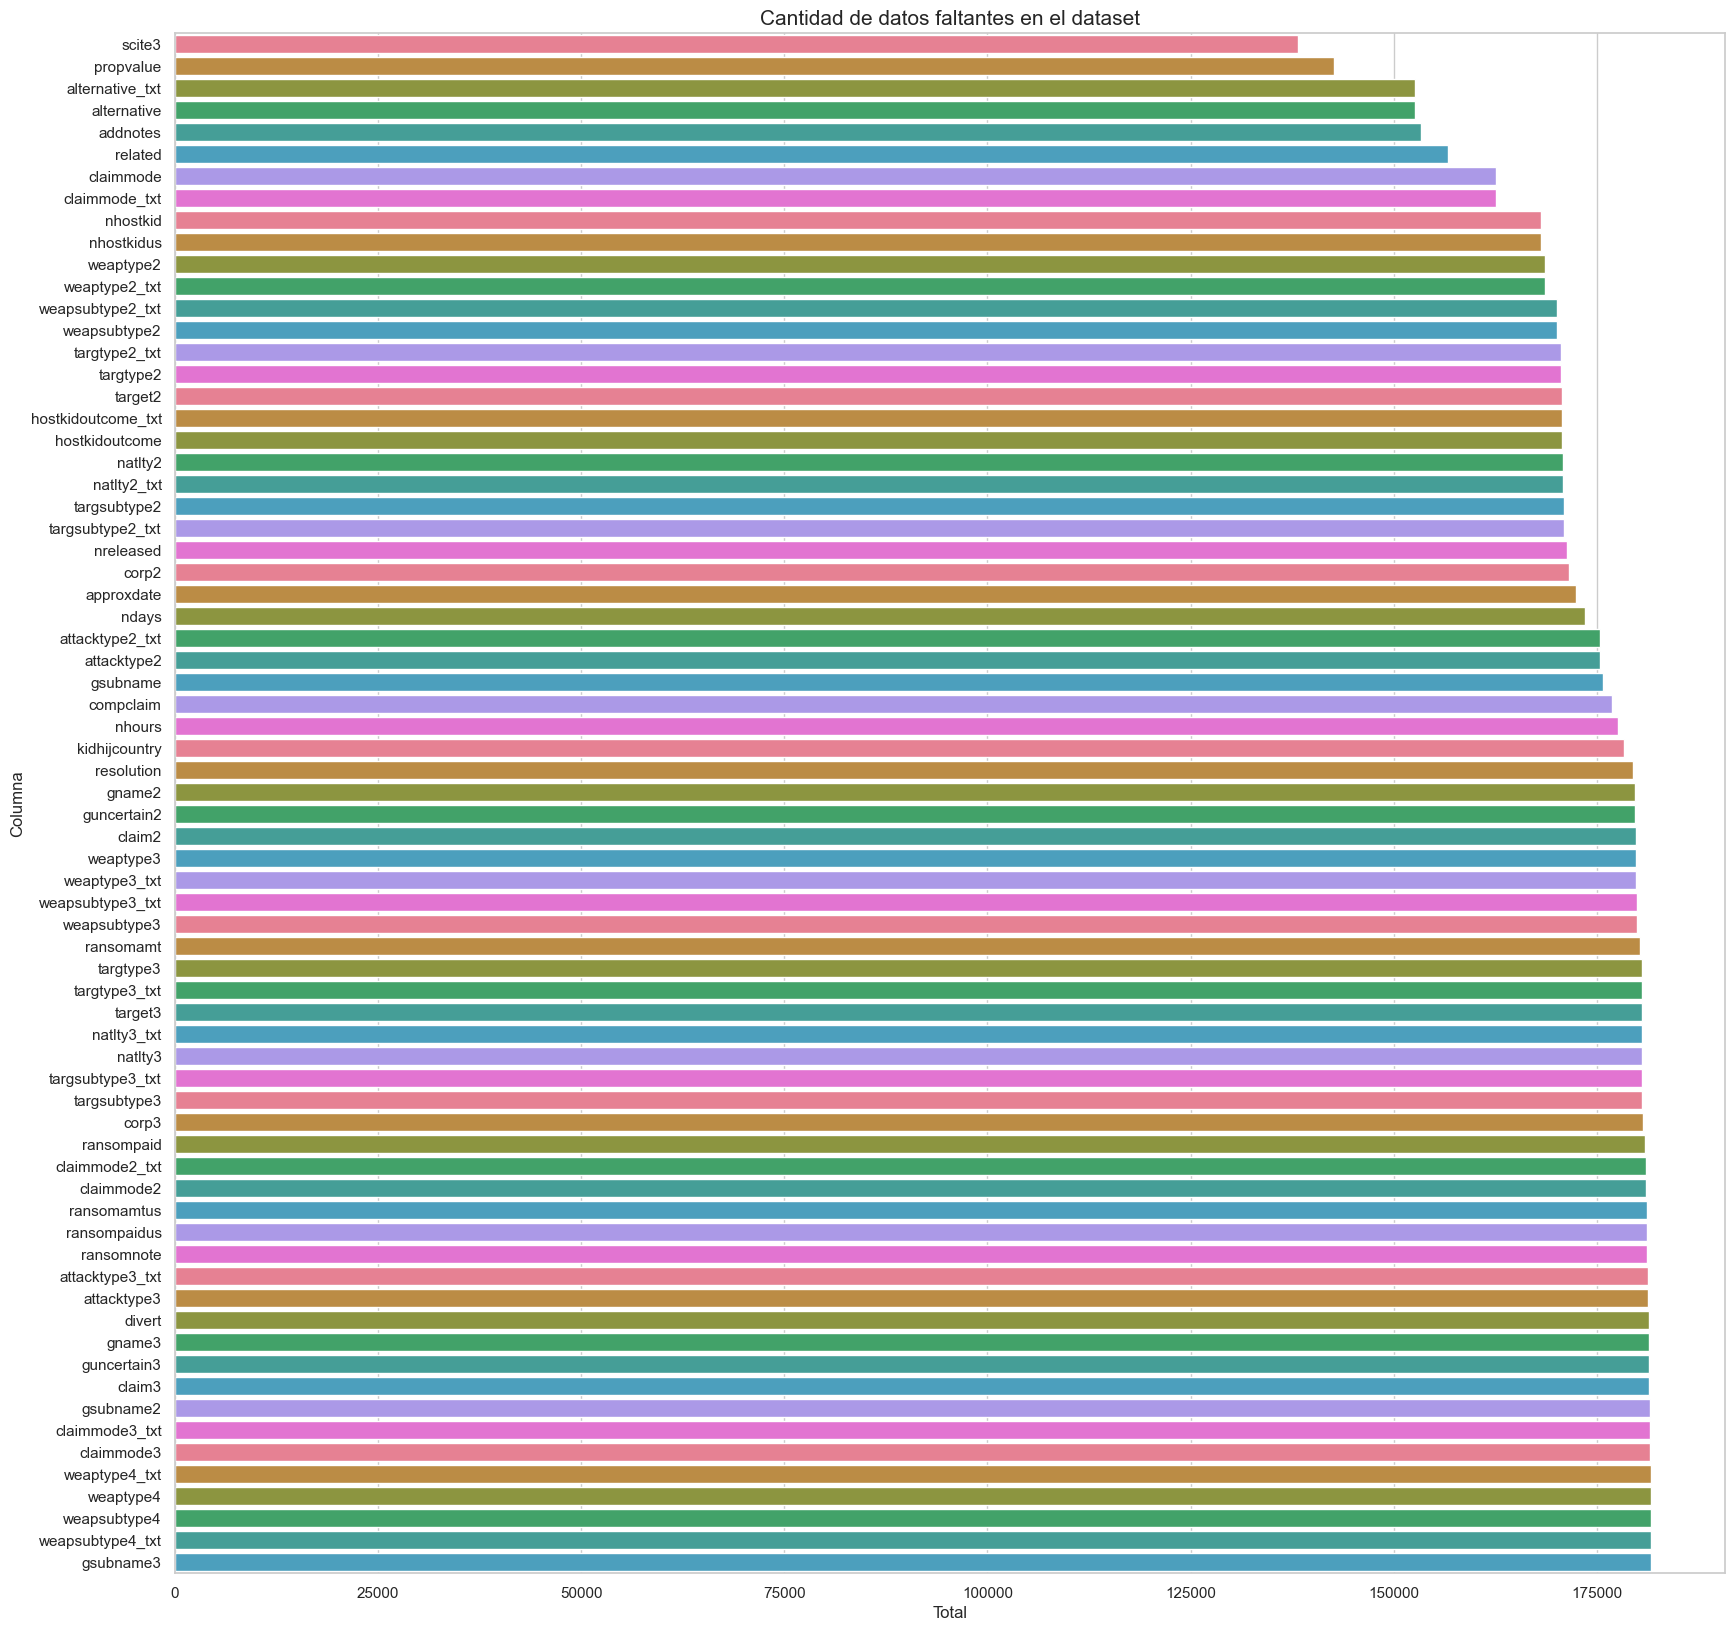

In [21]:
# Missing Values
missing_values = events.isnull().sum().sort_values().tail(70)
#print(missing_values)

# Outliers
plt.figure(figsize=(20, 20))
g = sns.barplot(y=missing_values.index, x=missing_values.values,palette=sns.color_palette("husl", 8), orient='h')
g.set_title("Cantidad de datos faltantes en el dataset", fontsize=15)
g.set_xlabel("Total", fontsize=12)
g.set_ylabel("Columna", fontsize=12);

In [22]:
# Pasamos a eliminar algunos datos que no son utiles para nuestro objetivo
1 - events.count()/len(events.index)

eventid               0.000000
iyear                 0.000000
imonth                0.000000
iday                  0.000000
approxdate            0.949150
extended              0.000000
resolution            0.987781
country               0.000000
country_txt           0.000000
region                0.000000
region_txt            0.000000
provstate             0.002317
city                  0.002389
latitude              0.025076
longitude             0.025081
specificity           0.000033
vicinity              0.000000
location              0.694564
summary               0.363964
crit1                 0.000000
crit2                 0.000000
crit3                 0.000000
doubtterr             0.000006
alternative           0.840328
alternative_txt       0.840328
multiple              0.000006
success               0.000000
suicide               0.000000
attacktype1           0.000000
attacktype1_txt       0.000000
attacktype2           0.965249
attacktype2_txt       0.965249
attackty

In [23]:
# Descartamos aquellas columnas que tengan mas de un 10% 
percentage = 10.0
min_count =  int(((100-percentage)/100)*events.shape[0] + 1)
events = events.dropna( axis=1, thresh=min_count)

In [24]:
# De aca hay varias columnas que no aportan a nuestra investigacion, antes de eso vemos que hay columnas con un numero que representa el id de un tipo de arma
# que tambien esta escrita en texto, corroboramos que la relacion sea uno a uno y en caso afirmativo las eliminamos

In [25]:
def check_text_counts(code_text_counts):
    if (code_text_counts > 1).any():
        print("There are codes with multiple text descriptions.")
        codes_with_multiple_texts = code_text_counts[code_text_counts > 1]
        print("Codes with multiple text descriptions:")
        print(codes_with_multiple_texts)
    else:
        print("Each code has only one corresponding text description.")

In [26]:
# Vemos que por cada 'weaptype1' solo haya un 'weaptype1_txt'
code_text_counts = events.groupby('weaptype1')['weaptype1_txt'].nunique()
check_text_counts(code_text_counts)

Each code has only one corresponding text description.


In [27]:
# Repetimos este proceso 'country' y 'country_txt'
code_text_counts = events.groupby('country')['country_txt'].nunique()
check_text_counts(code_text_counts)

Each code has only one corresponding text description.


In [28]:
# Repetimos este proceso 'region' y 'region_txt'
code_text_counts = events.groupby('region')['region_txt'].nunique()
check_text_counts(code_text_counts)

Each code has only one corresponding text description.


In [29]:
# Repetimos este proceso 'attacktype1' y 'attacktype1_txt'
code_text_counts = events.groupby('attacktype1')['attacktype1_txt'].nunique()
check_text_counts(code_text_counts)

Each code has only one corresponding text description.


In [30]:
# Repetimos este proceso 'targsubtype1' y 'targsubtype1_txt'
code_text_counts = events.groupby('targsubtype1')['targsubtype1_txt'].nunique()
check_text_counts(code_text_counts)

Each code has only one corresponding text description.


In [31]:
# Repetimos este proceso 'targtype1' y 'targtype1_txt'
code_text_counts = events.groupby('targtype1')['targtype1_txt'].nunique()
check_text_counts(code_text_counts)

Each code has only one corresponding text description.


In [32]:
# Repetimos este proceso 'natlty1' y 'natlty1_txt'
code_text_counts = events.groupby('natlty1')['natlty1_txt'].nunique()
check_text_counts(code_text_counts)

Each code has only one corresponding text description.


In [33]:
# Repetimos este proceso 'targtype1' y 'targtype1_txt'
code_text_counts = events.groupby('targsubtype1')['targsubtype1_txt'].nunique()
check_text_counts(code_text_counts)

Each code has only one corresponding text description.


In [34]:
# Las siguientes columnas no tienen descripcion de que representan en nuestra base de datos, las consideramos como no relevantes
columns_without_desc = ['INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'ishostkid', 'property', 'nwound', 'individual', 'guncertain1', 
                        'multiple', 'doubtterr', 'crit1', 'crit2', 'crit3', 'vicinity', 'specificity']

# Estas columnas dan informacion similar al pais donde fue el atentado
columns_with_no_relevant_info = ['target1']

# Columnas que tienen un id representado por strings
columnas_with_just_an_id = ['country', 'region', 'attacktype1', 'targsubtype1', 'targtype1', 'targtype1', 'weaptype1', 'natlty1', 'targsubtype1']

In [35]:
# Eliminamos las columnas con datos repetidos mas aquellas que no aporten informacion a nuestra mision
columns_to_drop = columns_without_desc + columns_with_no_relevant_info + columnas_with_just_an_id
events.drop(columns_to_drop, axis=1, inplace=True)

In [36]:
# Total de columnas restantes
events.shape

(181691, 21)

In [37]:
# Nos quedamos con estas columnas
events.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country_txt          object
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
success               int64
suicide               int64
attacktype1_txt      object
targtype1_txt        object
targsubtype1_txt     object
natlty1_txt          object
gname                object
weaptype1_txt        object
nkill               float64
dbsource             object
dtype: object

In [ ]:
# Calculate the correlation matrix
correlation_matrix = events.corr()

# Get all correlations excluding self-correlations
top_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_corr = top_corr[top_corr != 1]

# Flatten the multi-index column names
top_corr_cols = [col[0] if isinstance(col, tuple) else col for col in top_corr.index]

# Create a subset DataFrame with only the columns involved in top correlations
subset_df = events[list(set(top_corr_cols))]

# Create a scatter plot matrix
sns.set(style="ticks")
sns.pairplot(subset_df)
plt.suptitle('Correlations Scatter Plot Matrix', y=1.02)
plt.show()

/var/folders/10/vgks04qj23321r6krjr46v740000gn/T/ipykernel_3403/1998301575.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = events.corr()
